<a href="https://colab.research.google.com/github/maxkleiner/Bayes_theorem/blob/master/BFH_MAS_Masterarbeit_Code_Moving_Average_Evaluation_8_20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
!ls -l
df_all = pd.read_excel(r'./sample_data/AMZN.xlsx')

total 112
-rw-r--r-- 1 root root 107713 Oct 22 14:22 AMZN.xlsx
drwxr-xr-x 1 root root   4096 Oct 22 14:22 sample_data


In [12]:
df_amzn = pd.DataFrame()
df_amzn['Adj_Close'] = df_all['AMZN']
df_amzn['Daily_Return'] = df_amzn['Adj_Close'].diff().shift(-1)

In [13]:
df_amzn['moving_avg_8'] = df_amzn['Adj_Close'].rolling(8).mean().to_frame()
df_amzn['moving_avg_20'] = df_amzn['Adj_Close'].rolling(20).mean().to_frame()
df_amzn['signal_buy_8_20'] = np.where(df_amzn['moving_avg_8'] >= df_amzn['moving_avg_20'], 1, 0)
df_amzn['signal_sell_8_20'] = np.where(df_amzn['moving_avg_8'] < df_amzn['moving_avg_20'], -1, 0)
df_amzn['signal_buy_8_20_profit'] = df_amzn['Daily_Return'] * df_amzn['signal_buy_8_20']
df_amzn['signal_sell_8_20_profit'] = df_amzn['Daily_Return'] * df_amzn['signal_sell_8_20']
print('{}{}{}{}{}{}{}{}'.format('buy: ', df_amzn['signal_buy_8_20_profit'].sum(),
      '\nsell: ', df_amzn['signal_sell_8_20_profit'].sum(),
      '\nCombined: ', df_amzn['signal_buy_8_20_profit'].sum() + df_amzn['signal_sell_8_20_profit'].sum(),
      '\nhold: ', df_amzn['Daily_Return'].sum()))

buy: 1787.5375189781175
sell: -1414.8850884437575
Combined: 372.65243053436006
hold: 3187.985107421875


Check the corrs

In [14]:
df_amzn.corr()

,Adj_Close,Daily_Return,moving_avg_8,moving_avg_20,signal_buy_8_20,signal_sell_8_20,signal_buy_8_20_profit,signal_sell_8_20_profit
Adj_Close,1.000000,0.032754,0.999494,0.998715,0.091231,0.087288,0.027132,-0.018809
Daily_Return,0.032754,1.000000,0.034782,0.035794,-0.001234,-0.001748,0.731645,-0.681106
moving_avg_8,0.999494,0.034782,1.000000,0.999504,0.086268,0.083761,0.027290,-0.021681
moving_avg_20,0.998715,0.035794,0.999504,1.000000,0.071610,0.071610,0.027035,-0.023478
signal_buy_8_20,0.091231,-0.001234,0.086268,0.071610,1.000000,0.992786,0.020447,0.024018
signal_sell_8_20,0.087288,-0.001748,0.083761,0.071610,0.992786,1.000000,0.020299,0.024193
signal_buy_8_20_profit,0.027132,0.731645,0.027290,0.027035,0.020447,0.020299,1.000000,0.000491
signal_sell_8_20_profit,-0.018809,-0.681106,-0.021681,-0.023478,0.024018,0.024193,0.000491,1.000000


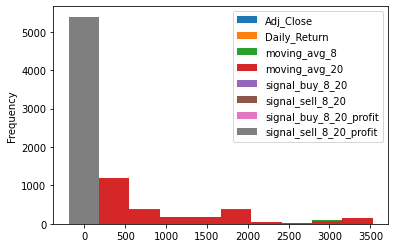

In [15]:
df_amzn.plot.hist()